<a href="https://colab.research.google.com/github/mani9752/WaterQualityPrediction_AICTE_Manish_G/blob/main/WaterQualityPrediction_AICTE_ManishG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries


In [3]:
import numpy as np
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


**Project**

To determint the water quality
water quality -> good -> no pollutants

**Dataset**

Data from the year 2000 - 2021



In [4]:
df = pd.read_csv('/content/WaterQualityAicte_Dataset.csv');

In [5]:
df.head()

,id;date;NH4;BSK5;Suspended;O2;NO3;NO2;SO4;PO4;CL
0,1;17.02.2000;0.33;2.77;12;12.3;9.5;0.057;154;0...
1,1;11.05.2000;0.044;3;51.6;14.61;17.75;0.034;35...
2,1;11.09.2000;0.032;2.1;24.5;9.87;13.8;0.173;41...
3,1;13.12.2000;0.17;2.23;35.6;12.4;17.13;0.099;2...
4,1;02.03.2001;0;3.03;48.8;14.69;10;0.065;281.6;...


The data is not seperated correctly and we see that the data is seperated by ';' hence we must use the seperator here as sep=';' in the data frame code

In [6]:
df = pd.read_csv('/content/WaterQualityAicte_Dataset.csv',sep=';');

In [7]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


**What we do**

1) understand the data set

2) EDA

3) Feature Extraction

4) Algorithm

5) Evaluate

6) Deploy -> using the streamlit

**Understanding the data 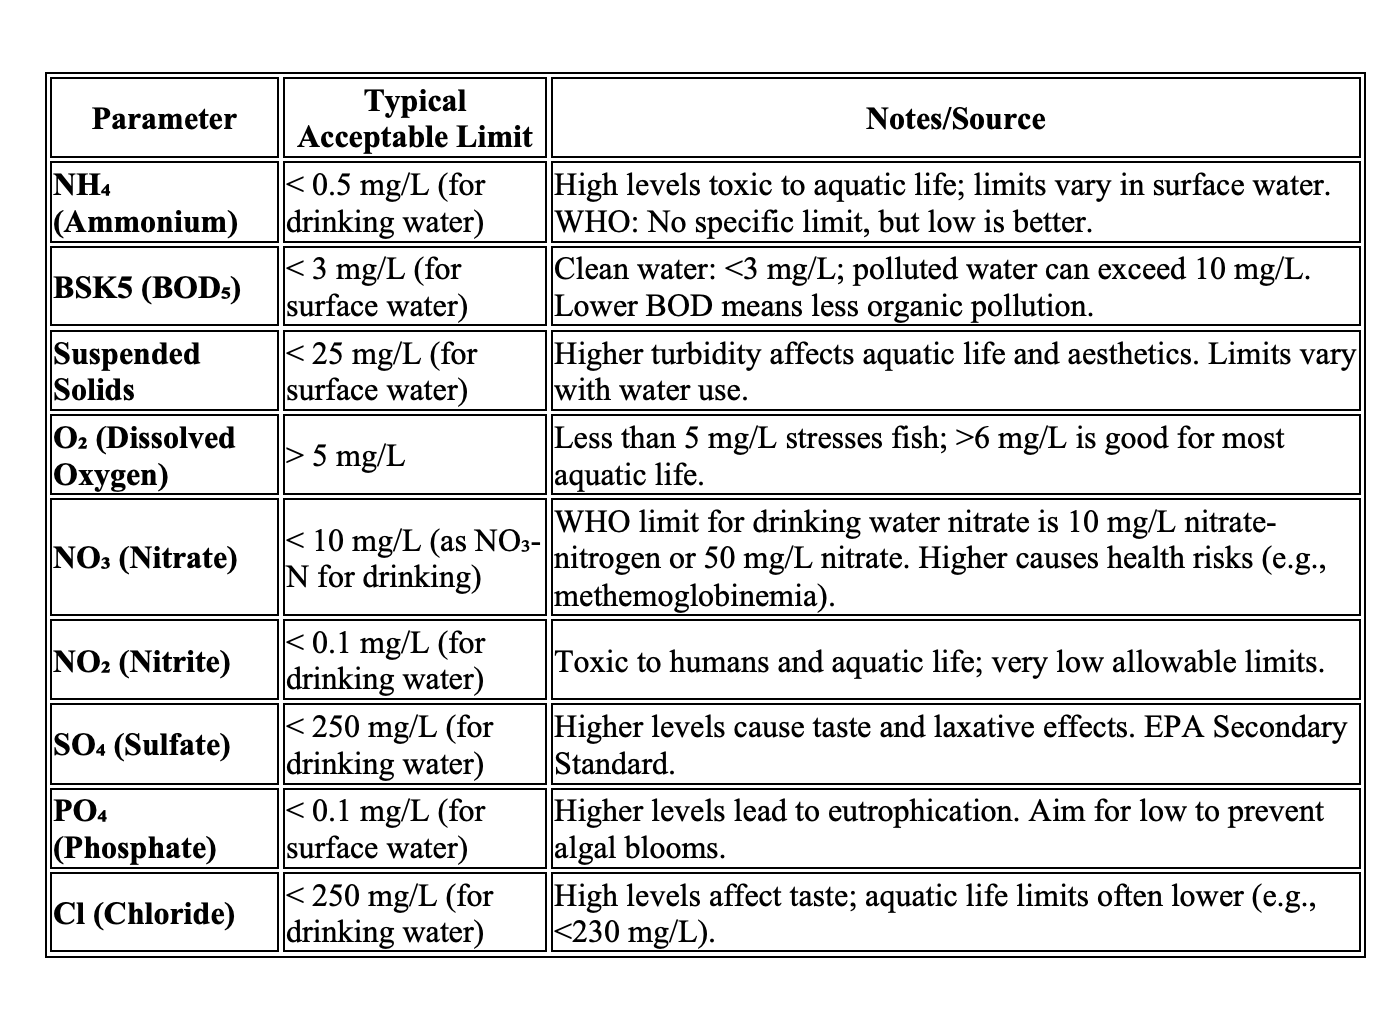set **



**EDA**

In [8]:
df.info() #gives the information of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [9]:
df.shape # we get rows and columns

(2861, 11)

In [10]:
#gettingthe stastics of the data
df.describe()

,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
count,2861.000000,2858.000000,2860.000000,2845.000000,2858.000000,2860.000000,2858.000000,2812.000000,2833.000000,2812.000000
mean,12.397064,0.758734,4.316182,12.931905,9.508902,4.316846,0.246128,59.362313,0.418626,93.731991
std,6.084226,2.486247,2.973997,16.543097,4.428260,6.881188,2.182777,96.582641,0.771326,394.512184
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,8.000000,0.080000,2.160000,6.000000,7.092500,1.390000,0.030000,27.052500,0.130000,26.800000
50%,14.000000,0.220000,3.800000,10.000000,8.995000,2.800000,0.059000,37.800000,0.270000,33.900000
75%,16.000000,0.500000,5.800000,15.000000,11.520000,5.582500,0.125750,64.640000,0.470000,45.607500
max,22.000000,39.427000,50.900000,595.000000,90.000000,133.400000,109.000000,3573.400000,13.879000,5615.280000


In [11]:
#if we want the transpose version we use
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [12]:
#since in the df.info() we get the date as the object but not as the date format we neeed to convert it into the date
df['date'] = pd.to_datetime(df['date'])

/tmp/ipython-input-12-2123322807.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [13]:
# cross checking now
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [14]:
df.info() # we are checkin weather the object format is changed into the date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [15]:
#sorting the values by the date and the id
df = df.sort_values(by=['id','date'])

In [16]:
df.head() # will return the first 5 rows

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [17]:
#checking for the missing values
df.isnull().sum()

,0
id,0
date,0
NH4,3
BSK5,1
Suspended,16
O2,3
NO3,1
NO2,3
SO4,49
PO4,28


In [18]:
df['year'] = df['date'].dt.year

In [19]:
df['month'] = df['date'].dt.month

In [20]:
df.head() # to check the new column of the year and the month

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [21]:
pollutants = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

Week -2

23 jun 2025


In [22]:
#drop the missing values - dropna();
df = df.dropna(subset=pollutants)


In [23]:
df.isnull().sum()

,0
id,0
date,0
NH4,0
BSK5,0
Suspended,0
O2,0
NO3,0
NO2,0
SO4,0
PO4,0


In [24]:
#Feature and the Target selection
X = df[['id','year']]
Y = df[pollutants]

In [25]:
# Encoding

#one hot encoder  - 22 stations - 1

X_encoded = pd.get_dummies(X, columns=['id'],drop_first=True)




In [26]:
#Tranin Test and Split

X_train,X_test,Y_train,Y_test = train_test_split(
    X_encoded,Y,test_size=0.2,random_state=42
)

In [27]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,random_state=42))

In [28]:
model.fit(X_train,Y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [29]:
#Evauate model
Y_pred = model.predict(X_test)

In [30]:
print("Model performance on test Data : ")
for i,pollutant in enumerate(pollutants):
  print(f'{pollutant}:')
  print(' MSE :',mean_squared_error(Y_test.iloc[:,i],Y_pred[:,i]))
  print(' RMSE :',np.sqrt(mean_squared_error(Y_test.iloc[:,i],Y_pred[:,i])))
  print(' R2 :',r2_score(Y_test.iloc[:,i],Y_pred[:,i]))
  print()

Model performance on test Data : 
NH4:
 MSE : 0.8827195364614927
 RMSE : 0.9395315516051032
 R2 : 0.7801981883484587

BSK5:
 MSE : 5.31094542545559
 RMSE : 2.3045488550810957
 R2 : 0.19096990064204467

Suspended:
 MSE : 98.17784721522588
 RMSE : 9.908473505804306
 R2 : 0.20495839046561737

O2:
 MSE : 13.955930601011778
 RMSE : 3.7357637239273815
 R2 : 0.05381534726017545

NO3:
 MSE : 20.40490374797047
 RMSE : 4.517178737660318
 R2 : 0.484569230962687

NO2:
 MSE : 10.343405404494533
 RMSE : 3.216116509782339
 R2 : -58.203860061465534

SO4:
 MSE : 2275.807351900022
 RMSE : 47.7054226676593
 R2 : 0.44815941114800695

PO4:
 MSE : 0.24389334027446746
 RMSE : 0.4938555864566761
 R2 : 0.43586964570072984

CL:
 MSE : 32661.43741785968
 RMSE : 180.72475596292745
 R2 : 0.7526035914013255



In [31]:
station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")


Predicted pollutant levels for station '22' in 2024:
  NH4: 0.03
  BSK5: 2.57
  Suspended: 5.69
  O2: 13.25
  NO3: 6.93
  NO2: 0.07
  SO4: 144.84
  PO4: 0.46
  CL: 67.36


In [32]:
import joblib

joblib.dump(model,'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(),"model_colums.pkl")
print("Models and cols structured are saved")

Models and cols structured are saved
